# Shark Tank

_Shark Tank_ is a reality TV show. Contestants present their idea for a company to a panel of investors (a.k.a. "sharks"), who then decide whether or not to invest in that company.  The investors give a certain amount of money in exchange for a percentage stake in the company ("equity"). If you are not familiar with the show, you may want to watch part of an episode [here](https://www.youtube.com/watch?v=3VBmLGUDxWA) to get a sense of how it works.  You can also search for a clip on YouTube. 

The data that you will examine in this lab contains data about all contestants from the first 6 seasons of the show, including:
- the name and industry of the proposed company
- whether or not it was funded (i.e., the "Deal" column)
- which sharks chose to invest in the venture (N.B. There are 7 regular sharks, not including "Guest". Each shark has a column in the data set, labeled by their last name.)
- if funded, the amount of money the sharks put in and the percentage equity they got in return

To earn full credit on this lab, you should:
- use built-in `pandas` methods (like `.sum()` and `.max()`) instead of writing a for loop over a `DataFrame` or `Series`
- use the split-apply-combine pattern wherever possible

Of course, if you can't think of a vectorized solution, a `for` loop is still better than no solution at all!

In [23]:

%matplotlib inline
import pandas as pd

## Question 0. Getting and Cleaning the Data

The data is stored in the CSV file `sharktank.csv`. Read in the data into a Pandas `DataFrame`.

In [24]:
# YOUR CODE HERE
sharkTankData = pd.read_csv("sharktank.csv")
sharkTankData.head()


,Season,No. in series,Company,Deal,Industry,Entrepreneur Gender,Amount,Equity,Corcoran,Cuban,Greiner,Herjavec,John,O'Leary,Harrington,Guest,Details / Notes
0,1.0,1.0,Ava the Elephant,Yes,Healthcare,Female,"$50,000",55%,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1.0,1.0,Mr. Tod's Pie Factory,Yes,Food and Beverage,Male,"$460,000",50%,1.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN
2,1.0,1.0,Wispots,No,Business Services,Male,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1.0,1.0,College Foxes Packing Boxes,No,Lifestyle / Home,Male,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1.0,1.0,Ionic Ear,No,Uncertain / Other,Male,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


There is one column for each of the sharks. A 1 indicates that they chose to invest in that company, while a missing value indicates that they did not choose to invest in that company. Notice that these missing values show up as NaNs when we read in the data. Fill in these missing values with zeros. Other columns may also contain NaNs; be careful not to fill those columns with zeros, or you may end up with strange results down the line.

In [25]:
# YOUR CODE HERE
sharkTankData.loc[:, 'Corcoran': 'Guest'] = sharkTankData.loc[:, "Corcoran": "Guest"].fillna(0)
#sharkTankData

Notice that Amount and Equity are currently being treated as categorical variables (`dtype: object`). Can you figure out why this is? Clean up these columns and cast them to numeric types (i.e., a `dtype` of `int` or `float`) because we'll need to perform mathematical operations on these columns.

In [26]:
# sharsharkTankData []""# YOUR CODE HERE
sharkTankData["Amount"] = sharkTankData['Amount'].str[1:]
sharkTankData["Amount"] = sharkTankData["Amount"].str.replace(',', '')
sharkTankData["Amount"] = sharkTankData["Amount"].astype('float')
# sharkTankData["Amount"]

sharkTankData["Equity"] = sharkTankData['Equity'].str[:-1]
sharkTankData["Equity"] = sharkTankData["Equity"].astype("float")
# sharkTankData["Equity"]

## Question 1. Which Company was Worth the Most?

The valuation of a company is how much it is worth. If someone invests \\$10,000 for a 40\% equity stake in the company, then this means the company must be valued at \$25,000, since 40% of \\$25,000 is \\$10,000.

Calculate the valuation of each company that was funded. Which company was most valuable? Is it the same as the company that received the largest total investment from the sharks?

In [27]:
# YOUR CODE HERE

sharkTankData["Valuation"] = (sharkTankData["Amount"] / (sharkTankData["Equity"] / 100))
sharkTankData = sharkTankData.sort_values(['Valuation'])
sharkTankData = sharkTankData.dropna(subset=["Valuation"])
sharkTankData = sharkTankData.drop(312)
print("Most Valuable company", sharkTankData.loc[sharkTankData["Valuation"].idxmax()].Company)
print("Larget total investment", sharkTankData.loc[sharkTankData["Amount"].idxmax()].Company)

# sharkTankData["Valuation"]


Most Valuable company Zipz
Larget total investment AirCar


**YOUR EXPLANATION HERE** <br>
The most valuable company was Zipz but it did the largest total investment from the sharks. 

## Question 2. Which Shark Invested the Most?

Calculate the total amount of money that each shark invested over the 6 seasons. Which shark invested the most total money over the 6 seasons?

_Hint:_ If $n$ sharks funded a given venture, then the amount that each shark invested is the total amount divided by $n$.

,Season,No. in series,Company,Deal,Industry,Entrepreneur Gender,Amount,Equity,Corcoran,Cuban,Greiner,Herjavec,John,O'Leary,Harrington,Guest,Details / Notes,Valuation,Investment Count,Investment Amount Per Shark
80,2.0,5.0,Lightfilm,Yes,Consumer Products,Male,10000.0,70.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,founders receive 75% of the profit's until the...,14285.714286,2.0,5000.0
10,1.0,3.0,Turbobaster,Yes,Food and Beverage,Female,35000.0,100.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,2% royalty,35000.000000,1.0,35000.0
42,1.0,10.0,The URO Club,Yes,Uncertain / Other,Male,25000.0,70.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,NaN,35714.285714,1.0,25000.0
275,5.0,4.0,Screen Mend,Yes,Lifestyle / Home,Mixed Team,30000.0,50.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,NaN,60000.000000,1.0,30000.0
156,3.0,15.0,Remyxx ReKixx Sneakers,Yes,Fashion / Beauty,Male,50000.0,80.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,NaN,62500.000000,1.0,50000.0


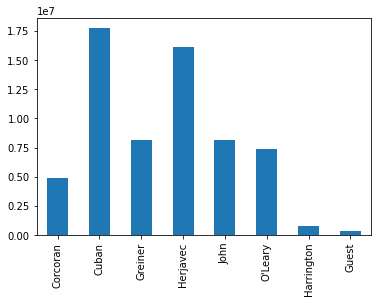

In [28]:
# ENTER CODE HERE.
sharkTankData["Investment Count"] = sharkTankData.loc[:, "Corcoran": "Guest"].sum(axis=1)

sharkTankData = sharkTankData[sharkTankData["Investment Count"] != 0]
sharkTankData = sharkTankData.dropna(subset=["Investment Count"])
# sharkTankData["Investment Count"].value_counts()

sharkTankData["Investment Amount Per Shark"] = sharkTankData["Amount"] / sharkTankData["Investment Count"]
# sharkTankData.head(50)

# sharkTankData.loc[:, "Corcoran": "Guest"].multiply(sharkTankData["Investment Amount Per Shark"], axis=0)

sharkTankData.loc[:, "Corcoran": "Guest"].multiply(sharkTankData["Investment Amount Per Shark"], axis=0).sum(axis=0).plot.bar()
print(sharkTankData.loc[:, "Corcoran": "Guest"].multiply(sharkTankData["Investment Amount Per Shark"], axis=0).sum(axis=0).idxmax())



**YOUR EXPLANATION HERE** <br>
Mark Cuban invested the most money over the 6 seasons. 

## Question 3. Do the Sharks Prefer Certain Industries?

Calculate the funding rate (the proportion of companies that were funded) for each industry. Make a visualization showing this information.

[]

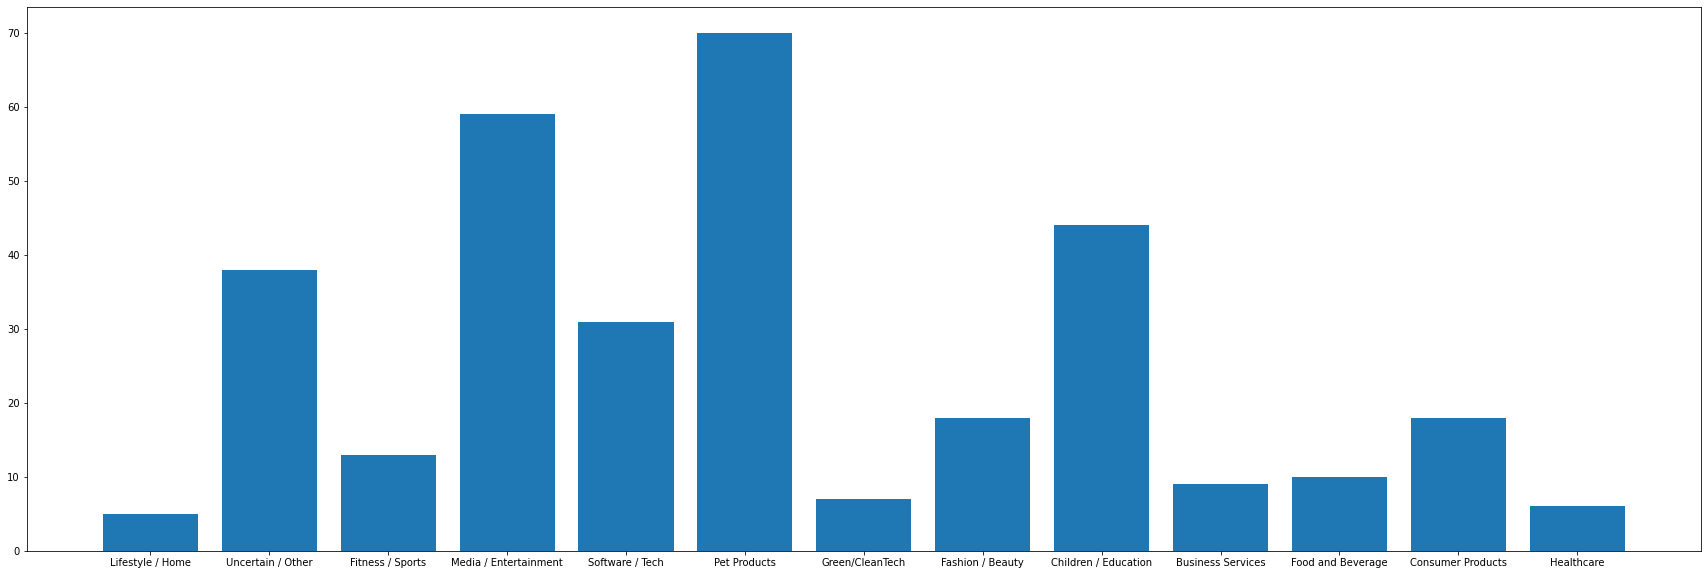

In [29]:
# ENTER CODE HERE.
import matplotlib.pyplot as plt
%matplotlib inline


# plt.xlabel("Industry")
# plt.ylabel("Rate %")
plt.figure(figsize=(30, 10))
industryCount = sharkTankData.groupby("Industry")["Investment Count"].sum()
industry = set(sharkTankData["Industry"].values)
# print(industryCount)


plt.bar(list(industry), industryCount)
plt.plot()




# sharkTankData["Industry"].value_counts()




**YOUR EXPLANATION HERE**<br>
Sharks prefer industry that are in the Food and Beverage. 

## Submission Instructions

Once you are finished, follow these steps:

1. Restart the kernel and re-run this notebook from beginning to end by going to `Kernel > Restart Kernel and Run All Cells`.

2. If this process stops halfway through, that means there was an error. Correct the error and repeat Step 1 until the notebook runs from beginning to end.

3. Double check that there is a number next to each code cell and that these numbers are in order.

Then, submit your lab as follows:

1. Go to `File > Export Notebook As > PDF`.

2. Double check that the entire notebook, from beginning to end, is in this PDF file. (If the notebook is cut off, try first exporting the notebook to HTML and printing to PDF.)

3. Upload the PDF to Gradescope and Notebook (ipynb) to iLearn
4. Demo your lab.